In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
with open("allData.pkl","rb") as f:
    d=pickle.load(f)

In [3]:
d.keys()

dict_keys(['Resources', 'TomQuality', 'CropParameters', 'LabAnalysis', 'Production', 'GrodanSens', 'GreenhouseClimate'])

In [4]:
tomquality=d['TomQuality']

In [5]:
tomquality.shape

(48, 8)

In [6]:
tomquality.dtypes

%time          int64
Flavour        int64
TSS          float64
Acid         float64
%Juice         int64
Bite           int64
Weight       float64
DMC_fruit     object
dtype: object

In [7]:
tomquality.nunique()

%time         8
Flavour      17
TSS          21
Acid         29
%Juice       18
Bite         44
Weight       35
DMC_fruit    35
dtype: int64

In [8]:
#View the data
tomquality.head()

,%time,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit
0,43880,77,8.0,14.5,66,179,8.97,NaN
1,43894,77,8.6,14.5,63,274,8.80,NaN
2,43908,73,8.4,14.0,56,315,10.00,8.19
3,43922,79,9.2,14.4,60,382,9.10,9.31
4,43936,80,9.3,14.5,61,288,8.50,9.46


In [9]:
tomquality.columns

Index(['%time', 'Flavour ', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight',
       'DMC_fruit'],
      dtype='object')

In [10]:
#Basic information
tomquality.info()
#Describe the data
tomquality.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %time      48 non-null     int64  
 1   Flavour    48 non-null     int64  
 2   TSS        48 non-null     float64
 3   Acid       48 non-null     float64
 4   %Juice     48 non-null     int64  
 5   Bite       48 non-null     int64  
 6   Weight     48 non-null     float64
 7   DMC_fruit  37 non-null     object 
dtypes: float64(3), int64(4), object(1)
memory usage: 3.1+ KB


,%time,Flavour,TSS,Acid,%Juice,Bite,Weight
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,43929.250000,76.270833,8.645000,13.222917,61.000000,237.895833,10.271042
std,32.807952,4.296161,0.555334,1.551971,4.570954,58.734614,1.780362
min,43880.000000,65.000000,7.300000,9.000000,50.000000,139.000000,7.470000
25%,43904.500000,73.000000,8.275000,12.325000,58.000000,187.750000,9.082500
50%,43929.000000,77.000000,8.600000,13.500000,61.500000,236.500000,9.935000
75%,43953.500000,78.250000,9.000000,14.425000,64.000000,284.250000,11.017500
max,43980.000000,88.000000,9.900000,15.800000,69.000000,382.000000,16.800000


In [11]:
#Find the duplicates
tomquality.duplicated().sum()

0

In [12]:
#Find NaN values
tomquality.isna().sum()

%time         0
Flavour       0
TSS           0
Acid          0
%Juice        0
Bite          0
Weight        0
DMC_fruit    11
dtype: int64

In [13]:
#Replacing Nan values with mean of their respective columns
imputer = SimpleImputer(strategy = "mean")
cn= tomquality.columns
values =tomquality.values
df = imputer.fit_transform(values)
tomquality= pd.DataFrame(df, columns = cn)

In [14]:
tomquality.head()

,%time,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit
0,43880.0,77.0,8.0,14.5,66.0,179.0,8.97,9.063889
1,43894.0,77.0,8.6,14.5,63.0,274.0,8.80,9.063889
2,43908.0,73.0,8.4,14.0,56.0,315.0,10.00,8.190000
3,43922.0,79.0,9.2,14.4,60.0,382.0,9.10,9.310000
4,43936.0,80.0,9.3,14.5,61.0,288.0,8.50,9.460000


In [15]:
#renaming
tomquality.rename(columns={'%time': 'Time'}, inplace=True)
tomquality.head()

,Time,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit
0,43880.0,77.0,8.0,14.5,66.0,179.0,8.97,9.063889
1,43894.0,77.0,8.6,14.5,63.0,274.0,8.80,9.063889
2,43908.0,73.0,8.4,14.0,56.0,315.0,10.00,8.190000
3,43922.0,79.0,9.2,14.4,60.0,382.0,9.10,9.310000
4,43936.0,80.0,9.3,14.5,61.0,288.0,8.50,9.460000


In [16]:
#changing time format
tomquality['Time'] = pd.to_datetime(tomquality['Time'], unit='D', origin='1899-12-30')

In [17]:
tomquality.head()

,Time,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit
0,2020-02-19,77.0,8.0,14.5,66.0,179.0,8.97,9.063889
1,2020-03-04,77.0,8.6,14.5,63.0,274.0,8.80,9.063889
2,2020-03-18,73.0,8.4,14.0,56.0,315.0,10.00,8.190000
3,2020-04-01,79.0,9.2,14.4,60.0,382.0,9.10,9.310000
4,2020-04-15,80.0,9.3,14.5,61.0,288.0,8.50,9.460000


<ipython-input-18-0ade3fba5067>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tomquality.corr(), annot=True)


<AxesSubplot:>

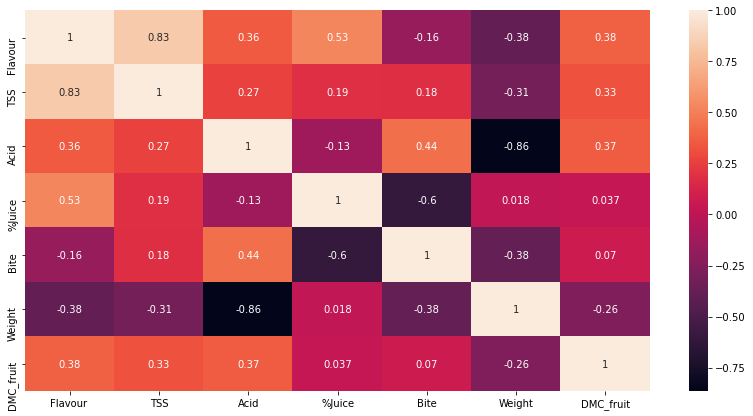

In [18]:
#correlation
plt.figure(figsize=(14,7))
sns.heatmap(tomquality.corr(), annot=True)

In [19]:
correlations = tomquality.corr()
cols = correlations
for i in cols:
    for j in cols:
         if i!=j and abs(correlations.loc[i, j])>= 0.6:
            print(f"{i} and {j} correlated with value {correlations.loc[i, j]}")

Flavour  and TSS correlated with value 0.8330747547004294
TSS and Flavour  correlated with value 0.8330747547004294
Acid and Weight correlated with value -0.8640261569419476
%Juice and Bite correlated with value -0.6046009475165508
Bite and %Juice correlated with value -0.6046009475165508
Weight and Acid correlated with value -0.8640261569419476


<ipython-input-19-b453e068c437>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = tomquality.corr()


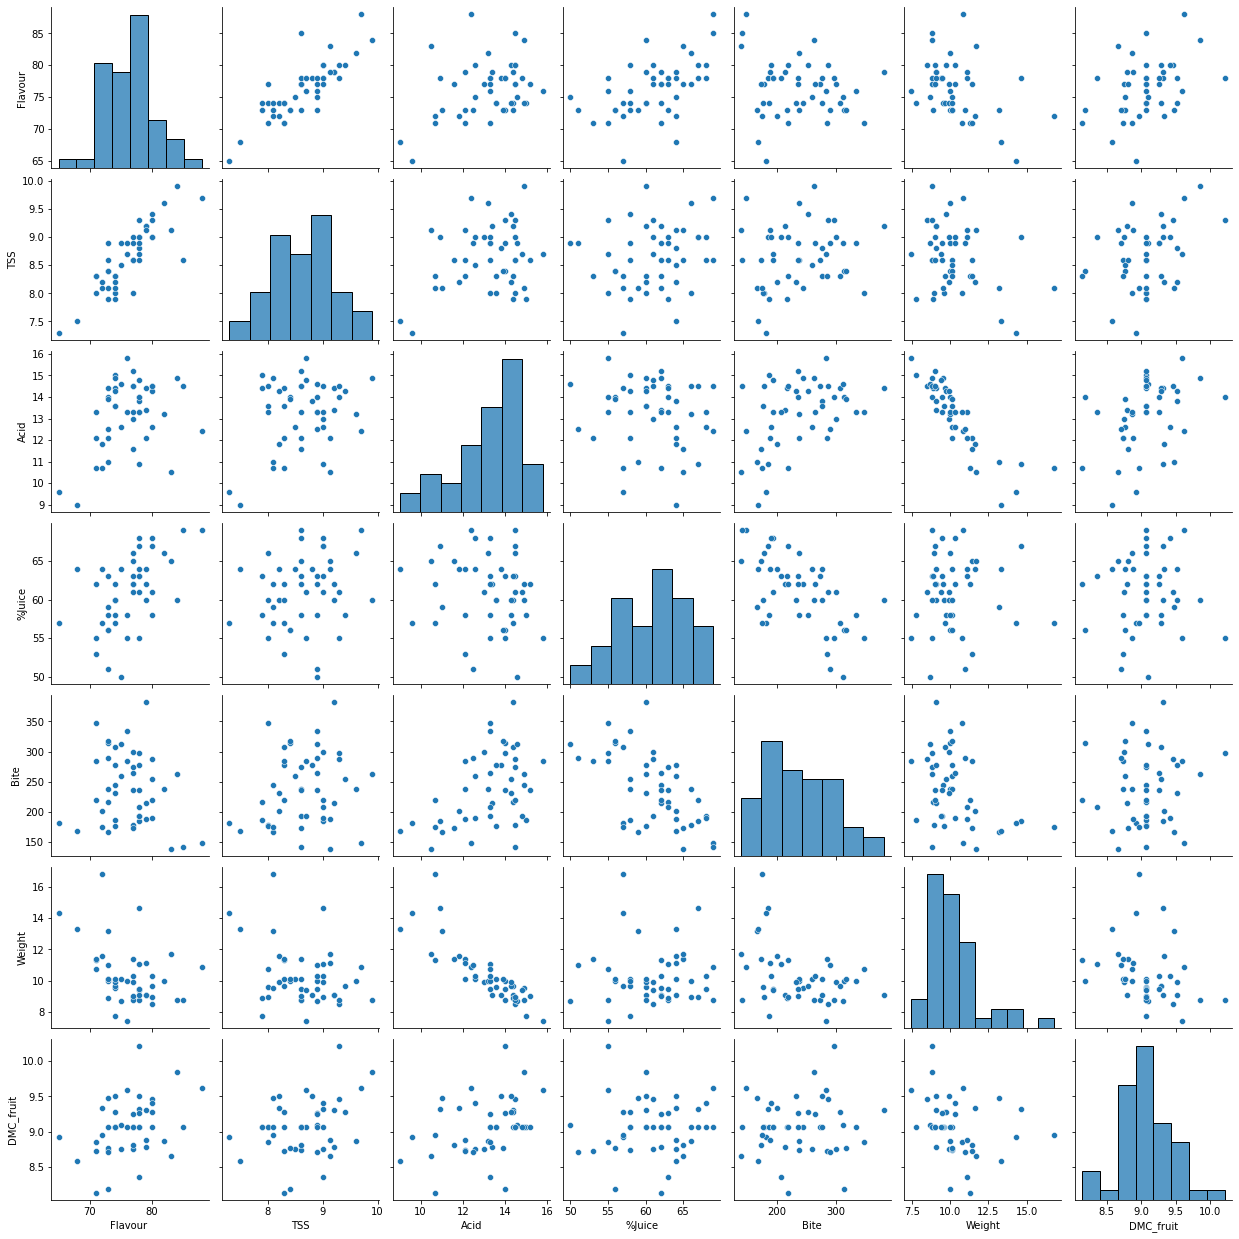

In [20]:
sns.pairplot(tomquality)

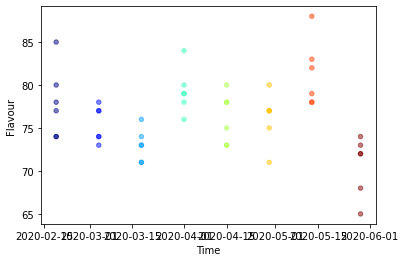

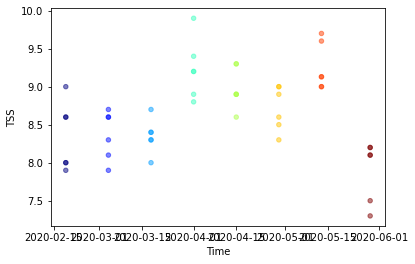

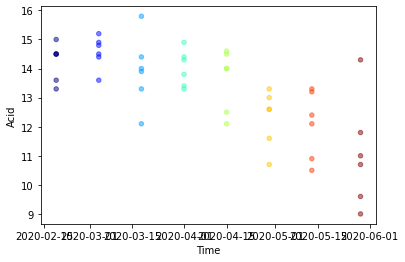

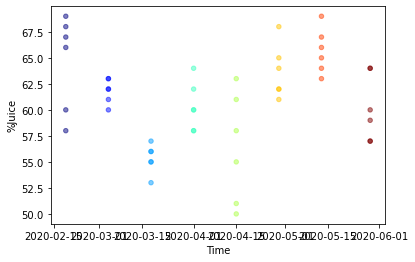

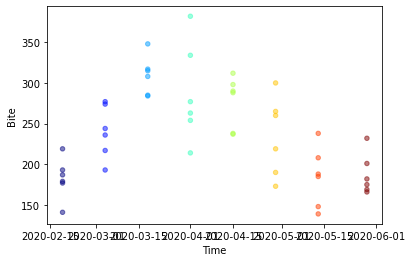

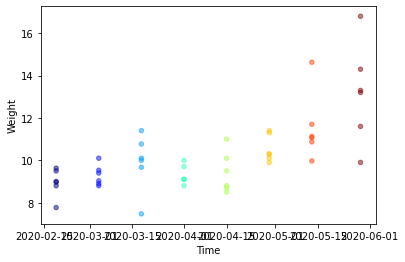

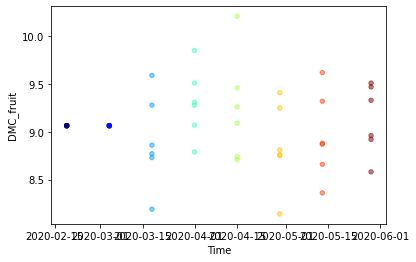

In [21]:
#scatter plot with respect to time 
columns=['Flavour ', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight',
       'DMC_fruit']
for i in columns:
    tomquality.plot(kind='scatter',x='Time', y=i, alpha=0.5, c='Time',cmap=plt.get_cmap("jet"))